In [1]:
from recovar import (
    RepresentationLearningSingleAutoencoder,
    RepresentationLearningMultipleAutoencoder,
    ClassifierAutocovariance,
    ClassifierAugmentedAutoencoder,
    ClassifierMultipleAutoencoder
)
from direct_tester import DirectTester
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import numpy as np

2025-07-05 15:14:45.302602: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-07-05 15:14:45.369376: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-07-05 15:14:45.369403: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-07-05 15:14:45.369634: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-07-05 15:14:45.397884: I tensorflow/core/platform/cpu_feature_g

In [ ]:
tester = DirectTester()

model_class = RepresentationLearningMultipleAutoencoder

In [13]:
TEST_DATA_PATH="/home/ege/recovar/reproducibility/preprocessed_data/stead_splits/FULL_DATASET_SUBSAMPLED_1_test.hdf5"
MODEL_PATH="/home/ege/recovar/reproducibility/checkpoints/FULL_DATASET_SUBSAMPLED_1_train_best_model.h5"

In [ ]:
results = tester.test(
    representation_model_class=model_class,
    classifier_wrapper_class=ClassifierMultipleAutoencoder,
    test_dataset_path=TEST_DATA_PATH,
    model_weights_path=MODEL_PATH,
    batch_size=256,
    use_hdf5_generator=True  
)

scores, labels = results
print(f"Got {len(scores)} predictions")


Loading model: representation_learning_autoencoder_ensemble
Loaded weights from: /home/ege/recovar/reproducibility/checkpoints/FULL_DATASET_SUBSAMPLED_1_train_best_model.h5

Testing on: /home/ege/recovar/reproducibility/preprocessed_data/stead_splits/FULL_DATASET_SUBSAMPLED_1_test.hdf5
Number of batches: 15
Using HDF5Generator
Processed 10/15 batches...
Processed 15/15 batches...

Testing completed:
Total samples: 3764
Earthquake samples: 3091
Noise samples: 673
Score range: [0.0000, 0.9977]
Got 3764 predictions


In [8]:
results

(array([0.3486687 , 0.22891319, 0.93299514, ..., 0.10458595, 0.0238626 ,
        0.5522382 ], dtype=float32),
 array([1, 1, 1, ..., 1, 0, 1], dtype=int32))

In [27]:
def plot_roc_curve(scores, labels, title="ROC Curve"):
    """
    Plot ROC curve and calculate AUC
    
    Args:
        scores: Predicted probabilities/scores
        labels: True binary labels (0/1)
        title: Plot title
    """

    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(labels, scores)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, 
             label=f'ROC curve (AUC = {roc_auc:.3f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', 
             label='Random classifier')
    
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print(f"AUC Score: {roc_auc:.4f}")
    return roc_auc

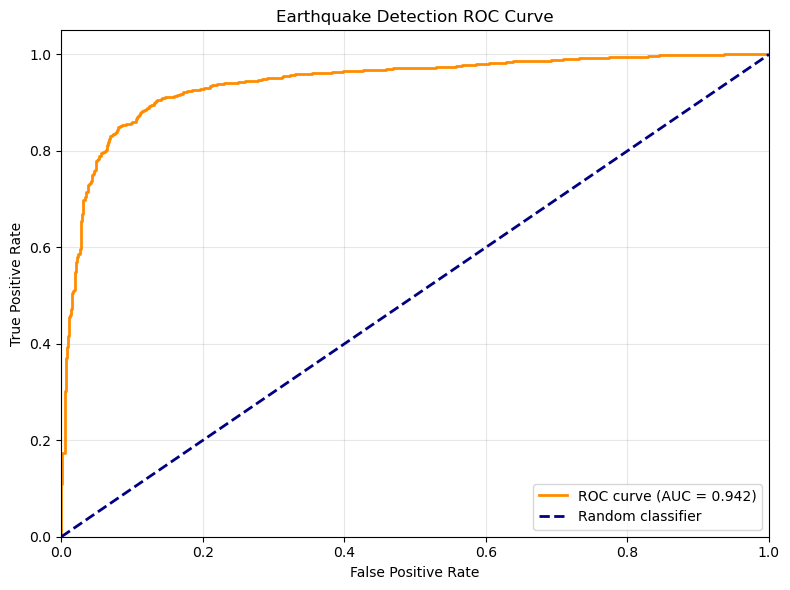

AUC Score: 0.9421


0.9421053213494769

In [28]:
scores, labels = results 
plot_roc_curve(scores, labels, "Earthquake Detection ROC Curve")